In [1]:
import torch
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from transformers import AutoImageProcessor, AutoModelForImageClassification
processor1 = AutoImageProcessor.from_pretrained("Devarshi/Brain_Tumor_Classification")
model = AutoModelForImageClassification.from_pretrained("Devarshi/Brain_Tumor_Classification")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.03k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/110M [00:00<?, ?B/s]

In [4]:
def predict(input):
  with torch.no_grad():
        logits = model(**input).logits
  predicted_label = logits.argmax(-1).item()
  return model.config.id2label[predicted_label]

In [5]:
import os
from PIL import Image

predictions = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)
  image = Image.open(image_path)
  image = image.resize((244, 244)).convert('RGB')
  input = processor1(images=image, return_tensors="pt")
  predictions.append(predict(input))

In [6]:
predictions

['pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tum

In [7]:
import os
from PIL import Image

true_pred = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)
  if "me" in image_path:
    true_pred.append("meningioma_tumor")
  elif "no" in image_path:
    true_pred.append("no_tumor")
  elif "pi" in image_path:
    true_pred.append("pituitary_tumor")
  elif "gl" in image_path:
    true_pred.append("glioma_tumor")

In [8]:
true_pred[0]

'glioma_tumor'

In [9]:
true_pred

['glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor'

In [10]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [11]:
accu_score = accuracy_score(true_pred, predictions)

In [12]:
accu_score

0.87

In [13]:
precision = precision_score(true_pred, predictions, average='weighted')

In [14]:
precision

0.9091811414392059

In [15]:
recall = recall_score(true_pred, predictions, average='macro')

In [16]:
recall

0.796875

In [17]:
f1_score = f1_score(true_pred, predictions, average='weighted')

In [18]:
f1_score

0.8370982221439889

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
cm = confusion_matrix(true_pred, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [21]:
import matplotlib.pyplot as plt

In [22]:
# disp.plot()

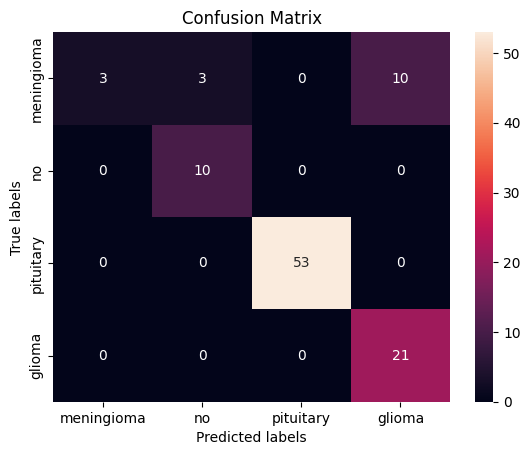

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['meningioma','no','pituitary','glioma']); ax.yaxis.set_ticklabels(['meningioma','no','pituitary','glioma']);

In [24]:
import torch
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
from PIL import Image


feature_extractor = AutoFeatureExtractor.from_pretrained("gulsmyigit/vit-base-patch16-224-finetuned-Brain-Tumor-Classification")
model = AutoModelForImageClassification.from_pretrained("gulsmyigit/vit-base-patch16-224-finetuned-Brain-Tumor-Classification")



preprocessor_config.json:   0%|          | 0.00/578 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/847 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [25]:
def predictionModel(input):
  with torch.no_grad():
    outputs = model(**input)
    logits =outputs.logits
  predicted_class_idx = logits.argmax(-1).item()
  labels = model.config.id2label
  predicted_class = labels[predicted_class_idx]
  return predicted_class

In [26]:
import os
from PIL import Image

predictions1 = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)
  image = Image.open(image_path)
  image = image.resize((244, 244)).convert('RGB')
  input = feature_extractor(images=image, return_tensors="pt")
  predictions1.append(predictionModel(input))

In [27]:
predictions1

['glioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'pituitary_tumor',
 'pituitary_tumor',
 'glioma_tumor',
 'meningioma_tumor',
 'glioma_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor',
 'no_tumor

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [29]:
accu_score = accuracy_score(true_pred, predictions1)

In [30]:
accu_score

0.91

In [31]:
precision = precision_score(true_pred, predictions1, average='weighted')

In [32]:
precision

0.9131313131313131

In [33]:
recall = recall_score(true_pred, predictions1, average='macro')

In [34]:
recall

0.840625

In [35]:
f1_score = f1_score(true_pred, predictions1, average='weighted')

In [36]:
f1_score

0.9046271929824562

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(true_pred, predictions1)

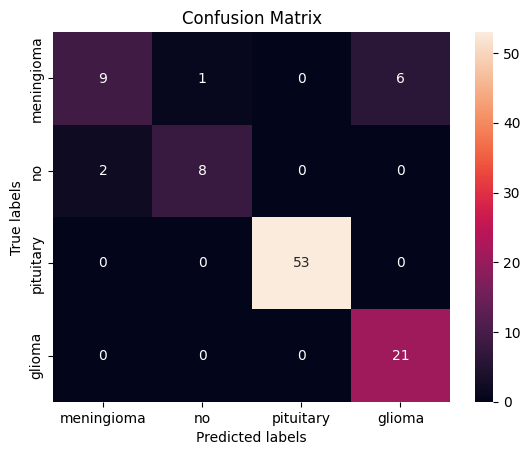

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['meningioma','no','pituitary','glioma']); ax.yaxis.set_ticklabels(['meningioma','no','pituitary','glioma']);

In [43]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor3 = AutoImageProcessor.from_pretrained("surajjoshi/Brain_Tumor_Classification_using_swin_transformer")
model = AutoModelForImageClassification.from_pretrained("surajjoshi/Brain_Tumor_Classification_using_swin_transformer")

preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/348M [00:00<?, ?B/s]

In [45]:
def predictModel4(input):
  with torch.no_grad():
      logits = model(**input).logits
  predicted_label = logits.argmax(-1).item()
  return model.config.id2label[predicted_label]

In [46]:
import os
from PIL import Image

predictions4 = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"  # Define the directory containing the images

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)  # Construct the full path to the image
  image = Image.open(image_path)  # Open the image using the full path
  image = image.resize((244, 244)).convert('RGB')
  input = processor1(images=image, return_tensors="pt")
  predictions4.append(predictModel4(input))

In [47]:
import os
from PIL import Image

true_pred1 = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"  # Define the directory containing the images

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)  # Construct the full path to the image
  if "me" in image_path:
    true_pred1.append("Meningioma Tumor")
  elif "no" in image_path:
    true_pred1.append("No Tumor")
  elif "pi" in image_path:
    true_pred1.append("Pituitary Tumor")
  elif "gl" in image_path:
    true_pred1.append("Gliomas Tumor")

In [48]:
predictions4

['Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Meningiomas Tumor',
 'Meningiomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Pituitary Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Meningiomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Meningiomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumor',
 'Gliomas Tumo

In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [50]:
accu_score4 = accuracy_score(true_pred1, predictions4)

In [51]:
accu_score4

0.37

In [52]:
precision4 = precision_score(true_pred1, predictions4, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
precision4

0.24045454545454548

In [54]:
recall4 = recall_score(true_pred1, predictions4, average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
recall4

0.4

In [56]:
f1_score4 = f1_score(true_pred1, predictions4, average='weighted')

In [57]:
f1_score4

0.2691162790697675

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

In [59]:
cm = confusion_matrix(true_pred1, predictions4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

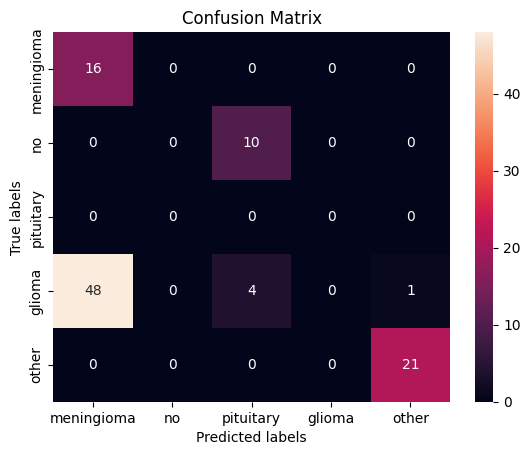

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

ax1= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax1);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax1.set_xlabel('Predicted labels');ax1.set_ylabel('True labels'); # Use ax1 instead of ax
ax1.set_title('Confusion Matrix');
# Adjust the number of tick labels to match the confusion matrix
tick_labels = ['meningioma', 'no', 'pituitary', 'glioma', 'other'] # Add the appropriate label for the 5th class
ax1.xaxis.set_ticklabels(tick_labels);
ax1.yaxis.set_ticklabels(tick_labels);

In [61]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

processor4 = AutoImageProcessor.from_pretrained("Heem2/brain-tumor-classification")
model = AutoModelForImageClassification.from_pretrained("Heem2/brain-tumor-classification")

preprocessor_config.json:   0%|          | 0.00/325 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/823 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

In [62]:
image = Image.open("/content/drive/MyDrive/MRI/brain_mri/brain_mri/Tr-pi_1373.jpg").convert('RGB')
inputs2 = processor4(images=image, return_tensors="pt")

In [63]:
with torch.no_grad():
    logits = model(**inputs2).logits
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

pituitary


In [64]:
def predictModel5(input):
  with torch.no_grad():
      logits = model(**input).logits
  predicted_label = logits.argmax(-1).item()
  return model.config.id2label[predicted_label]

In [65]:
import os
from PIL import Image

true_pred5 = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"  # Define the directory containing the images

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)  # Construct the full path to the image
  if "me" in image_path:
    true_pred5.append("meningioma")
  elif "no" in image_path:
    true_pred5.append("notumor")
  elif "pi" in image_path:
    true_pred5.append("pituitary")
  elif "gl" in image_path:
    true_pred5.append("glioma")

In [66]:
import os
from PIL import Image

predictions5 = []
image_dir = "/content/drive/MyDrive/MRI/brain_mri/brain_mri"

for img in os.listdir(image_dir):
  image_path = os.path.join(image_dir, img)
  image = Image.open(image_path)
  image = image.resize((244, 244)).convert('RGB')
  input = processor4(images=image, return_tensors="pt")
  predictions5.append(predictModel5(input))

In [67]:
predictions5

['glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'meningioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'meningioma',
 'glioma',
 'glioma',
 'glioma',
 'glioma',
 'meningioma',
 'meningioma',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'notumor',
 'pituitary',
 'pituitary',
 'pitu

In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [69]:
accu_score5 = accuracy_score(true_pred5, predictions5)

In [70]:
accu_score5

0.99

In [71]:
precision5 = precision_score(true_pred5, predictions5, average='weighted')

In [72]:
precision5

0.990909090909091

In [73]:
recall5 = recall_score(true_pred5, predictions5, average='macro')

In [74]:
recall5

0.984375

In [75]:
f1_score5 = f1_score(true_pred5, predictions5, average='weighted')

In [76]:
f1_score5

0.9900768049155146

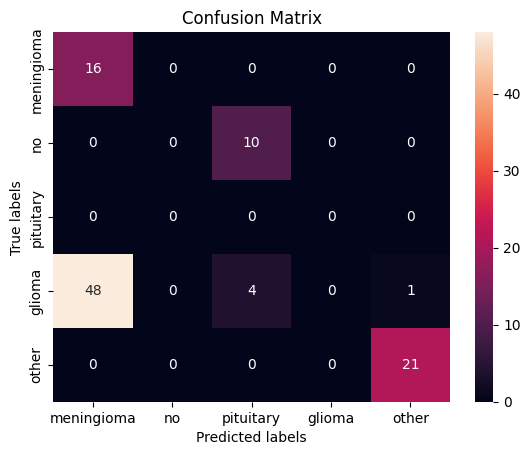

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');


ax.xaxis.set_ticklabels(['meningioma','no','pituitary','glioma', 'other']);
ax.yaxis.set_ticklabels(['meningioma','no','pituitary','glioma', 'other']);